# USGS earthquake data apply to Australia

In [ ]:
# This project apply USGS earthquake data to Australia situation and give some parameters that users can
# choose time, place and sort by magnitude as they want. When users tap in the coordinate where they are,
# it will return a distance the nearest earthquake is and show the map. I will explain how to edit the code
# for using in a wider situation in gernal later.

In [2]:
import requests
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import json
from geopy.distance import geodesic
import datetime

# API request

In [16]:
# First get data from USGS website, write a input box to allow user tap in start and end time and 
# minmagnitude to sort data they need, then return a simple result of how many earthquakes were in this 
# selection to test if the URL is accessable.

In [3]:
# Define the USGS earthquake data API URL
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

# Define the query parameters
params = {
    'format': 'geojson',
    'starttime': '',
    'endtime': '',
    'minmagnitude': '',
    'maxmagnitude': '10',
    'minlatitude': '-44.1',
    'maxlatitude': '-10.4',
    'minlongitude': '112.9',
    'maxlongitude': '154.4'
}

# Get the start and end time from the user
start_time = input('Enter the start time (YYYY-MM-DD): ')
end_time = input('Enter the end time (YYYY-MM-DD): ')

while True:
    try:
        min_mag = float(input('Enter the minimum magnitude: '))
        break  # Exit the loop if the input is valid
    except ValueError:
        print('Invalid input. Please enter a valid floating-point number.')

# Update the query parameters with the user's chosen time range
params['starttime'] = start_time
params['endtime'] = end_time

# Make a request to the USGS API with the updated query parameters
response = requests.get(url, params=params)

# If the request was successful, count the number of earthquakes in Australia
if response.status_code == 200:
    data = response.json()
    count = len(data['features'])
    print(f'There were {count} earthquakes in or next to Australia between {start_time} and {end_time}.')
else:
    print('Error: Could not retrieve earthquake data from USGS API.')


Enter the start time (YYYY-MM-DD):  2022-01-01
Enter the end time (YYYY-MM-DD):  2023-01-01
Enter the minimum magnitude:  1


There were 72 earthquakes in or next to Australia between 2022-01-01 and 2023-01-01.


# Plot the earthquake points in Australia map

In [3]:
# Then we use matplotlib.pyplot to plot Australia map and add scatter points on it. Change points' colour
# by different magnititude.

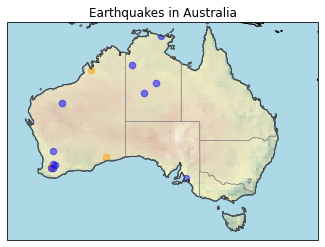

In [4]:
# Set the API endpoint and parameters
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": start_time,
    "endtime": end_time,
    "minmagnitude": min_mag,
    "latitude": "-25.27",
    "longitude": "133.77",
    "maxradiuskm": "5000"
}
    
# Make a GET request to the API endpoint
response = requests.get(url, params=params)

# Check if the response was successful
if response.status_code == 200:
    # Parse the response as GeoJSON data
    geojson_data = response.json()
    # Create a GeoDataFrame of the earthquake data
    earthquakes = gpd.GeoDataFrame.from_features(geojson_data, crs='epsg:4326')
    # Create a map of Australia using the Plate Carree projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([110, 160, -45, -10], crs=ccrs.PlateCarree())
    ax.stock_img()
    ax.coastlines()
    # Add natural earth features for land and ocean
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '110m', edgecolor='face', facecolor='lightblue'))
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    
    # Add scatter plot of earthquakes within the Australia map
    for feature in geojson_data["features"]:
        lat = feature["geometry"]["coordinates"][1]
        lon = feature["geometry"]["coordinates"][0]
        properties = feature.get("properties", {})        
        mag = properties.get("mag")
        # The colour changes with magnitude
        if mag is not None and lon >= 110 and lon <= 160 and lat >= -45 and lat <= -10:
            if mag >= 5:
                color = "red"
            elif mag >= 4.5:
                color = "orange"
            elif mag >= 4:
                color = "blue"
            else:
                color = "white"
            ax.scatter(lon, lat, s=mag*10, color=color, alpha=0.5, transform=ccrs.PlateCarree())
    plt.title("Earthquakes in Australia")
    plt.show()
   
else:
    # Print an error message if the response was unsuccessful
    print("Error: Could not retrieve earthquake data.")

# Sort data by state

In [19]:
# User can tap in the state name they want to get the earthquake points only in this state.

Enter state name (e.g. 'SA'):  SA


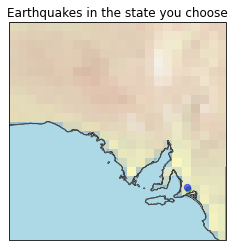

In [6]:
# Set the API endpoint and parameters
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": start_time,
    "endtime": end_time,
    "minmagnitude": min_mag,
    "latitude": "-25.27",
    "longitude": "133.77",
    "maxradiuskm": "5000"
}
# Make a GET request to the API endpoint
response = requests.get(url, params=params)

# Check if the response was successful
if response.status_code == 200:
    # Parse the response as GeoJSON data
    geojson_data = response.json()
    # Create a GeoDataFrame of the earthquake data
    earthquakes = gpd.GeoDataFrame.from_features(geojson_data, crs='epsg:4326')
    #state coordinate
    state_name={
        'SA':[129, 141, -38, -26],
        'ACT':[148.756,149.404,-35.922,-35.125],
        'NSW':[141,154.036,-36.987,-29.177],
        'NT':[129,138,-11.468,-25.996],
        'QLD':[138,153.549,-9.142,-29.177],
        'TAS':[144.568,148.297,-39.108,-43.648],
        'VIC':[140.966,149.974,-33.981,-39.17],
        'WA':[113,129,-14,-35],
    }
    
    #select an area you want to see
    state_code = input("Enter state name (e.g. 'SA'): ")

# Check if state code exists in the dictionary
    if state_code in state_name:

        lon_min, lon_max, lat_min, lat_max = state_name[state_code]
       
    # Create a map of the state we choose using the Plate Carree projection
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
        ax.stock_img()
        ax.coastlines()
    # Add natural earth features for land and ocean
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '110m', edgecolor='face', facecolor='lightblue'))
        ax.add_feature(cfeature.COASTLINE, linewidth=1)
        ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='gray')
        ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    
    # Add scatter plot of earthquakes within the selected state
        for feature in geojson_data["features"]:
            lat = feature["geometry"]["coordinates"][1]
            lon = feature["geometry"]["coordinates"][0]
            properties = feature.get("properties", {})        
            mag = properties.get("mag")
        # Add colour
            if mag is not None and lon >= 110 and lon <= 160 and lat >= -45 and lat <= -10:
                if mag >= 5:
                    color = "red"
                elif mag >= 4.5:
                    color = "orange"
                elif mag >= 4:
                    color = "blue"
                else:
                    color = "green"
                ax.scatter(lon, lat, s=mag*10, color=color, alpha=0.5, transform=ccrs.PlateCarree())
        plt.title("Earthquakes in the state you choose")
        plt.show()
    else:
        print('State code not found. Please enter a valid state code.')
else:
    # Print an error message if the response was unsuccessful
    print("Error: Could not retrieve earthquake data.")
    

# Get earthquakes information

In [ ]:
# Get the 10 earthquakes' information in the highest magnititude in the state user choosed.

In [7]:
# Set the API endpoint and parameters
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": start_time,
    "endtime": end_time,
    "minmagnitude": min_mag,
    "latitude": "-25.27",
    "longitude": "133.77",
    "maxradiuskm": "5000"
}

params['starttime'] = start_time
params['endtime'] = end_time
# Make a GET request to the API endpoint
response = requests.get(url, params=params)

# Check if the response was successful
if response.status_code == 200:
    # Parse the response as GeoJSON data
    geojson_data = response.json()
    # Create an empty list to store earthquake data
    earthquakes = []
    # create a dictionary
    region_dict = {
        'SA': [129, 141, -38, -26],
        'WA': [112, 129, -35, -13],
        'NT': [129, 138, -26, -10],
        'QLD': [138, 154, -29, -10],
        'NSW': [141, 154, -37, -28],
        'VIC': [140, 150, -39, -33],
        'TAS': [144, 148, -44, -39]
}
    # Get user input for region code
    region_code = input("Enter region code (e.g. 'SA'): ")
# Check if region code exists in the dictionary
    if region_code in region_dict:
    # Fill in longitude and latitude values
        lon_min, lon_max, lat_min, lat_max = region_dict[region_code]
        for feature in geojson_data["features"]:
        # Check if the earthquake is located within the boundaries of Australia
            lon, lat = feature["geometry"]["coordinates"][:2]
        # Definate the area we need
            if lon_min <= lon <= lon_max and lat_min <= lat <= lat_max:
            # Extract the earthquake information and append it to the list
                mag = feature["properties"]["mag"]
                time = feature["properties"]["time"]
                place = feature["properties"]["place"]
                earthquakes.append((mag, time, place))
    # Sort the list of earthquakes by magnitude in descending order
        earthquakes.sort(reverse=True)
    # Print the top 10 earthquakes by magnitude
        for i, (mag, time, place) in enumerate(earthquakes[:10]):
        # Convert the timestamp to a human-readable format
            timestamp = time
            timestamp_seconds = timestamp / 1000
            dt = datetime.datetime.utcfromtimestamp(timestamp_seconds)
            formatted_time = dt.strftime("%Y-%m-%d %H:%M:%S")
            print(f"{i+1}. Magnitude {mag} - {place} - {formatted_time}")
    else:
        print('State code not found. Please enter a valid state code.')
else:
    # Print an error message if the response was unsuccessful
    print("Error: Could not retrieve earthquake data.")


Enter region code (e.g. 'SA'):  SA


1. Magnitude 4 - 3 km SW of Mount Barker, Australia - 2022-03-05 20:50:07
2. Magnitude 3 - 3 km ESE of Macclesfield, Australia - 2022-03-29 08:34:51


# Apply in the real world of this program

In [ ]:
# Here is an example of calculating the distance of the nearst earthquake from where user is. When tap in 
# the coordinate, it will return a distance of the nearest earthquake, 5 nearest earthquakes' information,
# and a map.

Enter your latitude:  12


Latitude must be in the [-45; -10] range.


Enter your latitude:  -35
Enter your longitude:  111


The distance to the nearest earthquake is approximately 581.81 kilometers.
Nearest 5 Earthquakes:
1. Distance: 581.81 kilometers, Magnitude: 4.2, Place: 32 km WSW of Wagin, Australia,Time:2022-01-22 07:40:47
2. Distance: 591.24 kilometers, Magnitude: 4.9, Place: 23 km W of Wagin, Australia,Time:2022-01-24 21:24:48
3. Distance: 608.42 kilometers, Magnitude: 4.3, Place: 13 km S of Wagin, Australia,Time:2022-02-01 10:41:02
4. Distance: 643.93 kilometers, Magnitude: 4.2, Place: 29 km NE of Narrogin, Australia,Time:2022-01-24 21:50:14
5. Distance: 651.79 kilometers, Magnitude: 4.2, Place: 41 km E of Narrogin, Australia,Time:2022-01-05 11:37:04


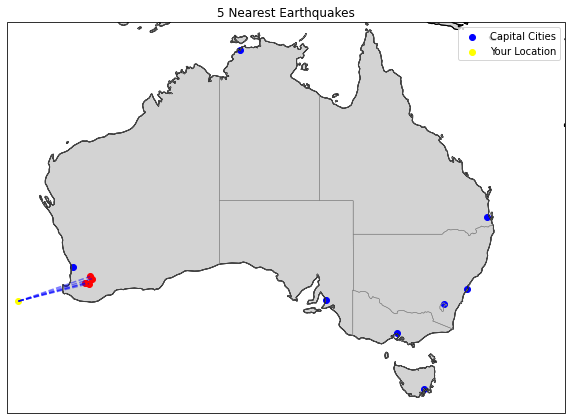

In [8]:
# Get user input for latitude and longitude
latitude = None

while latitude is None:
    try:
        latitude = float(input("Enter your latitude: "))
        if not -45 <= latitude <= -10:
            print("Latitude must be in the [-45; -10] range.")
            latitude = None
    except ValueError:
        print("Invalid input. Please enter a valid latitude.")

longitude = None

while longitude is None:
    try:
        longitude = float(input("Enter your longitude: "))
        if not 110 <= longitude <= 160:
            print("Longitude must be in the [110; 160] range.")
            longitude = None
    except ValueError:
        print("Invalid input. Please enter a valid longitude.")

# Build the URL for the USGS API query
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'
params = {
    "format": "geojson",
    "starttime": start_time,
    "endtime": end_time,
    "minmagnitude": min_mag,
    'maxmagnitude': '10',
    'minlatitude': -43.634597,
    'maxlatitude': -9.083334,
    'minlongitude': 112.909308,
    'maxlongitude': 153.63875,
}

# Send a GET request to the USGS API
response = requests.get(url, params=params)
data = response.json()

# Calculate the distance to the nearest earthquake
nearest_distance = float('inf')
nearest_earthquake = None

for feature in data['features']:
    quake_longitude, quake_latitude = feature['geometry']['coordinates'][:2]
    distance = geodesic((latitude, longitude), (quake_latitude, quake_longitude)).kilometers
    nearest_distance = min(nearest_distance, distance)

# Print the distance to the nearest earthquake
print(f"The distance to the nearest earthquake is approximately {nearest_distance:.2f} kilometers.")

# Calculate the distance to each earthquake and store its information
earthquakes = []
for feature in data['features']:
    quake_longitude, quake_latitude = feature['geometry']['coordinates'][:2]
    distance = geodesic((latitude, longitude), (quake_latitude, quake_longitude)).kilometers
    earthquakes.append((distance, feature))

# Sort the list of earthquakes by distance in ascending order
earthquakes.sort()

# Print the nearest 5 earthquakes
print("Nearest 5 Earthquakes:")
for i, (distance,feature) in enumerate(earthquakes[:5]):
        magnitude = feature['properties']['mag']
        place = feature['properties']['place']
        time = feature["properties"]["time"]
        # Convert the timestamp to a human-readable format
        timestamp = time
        timestamp_seconds = timestamp / 1000
        dt = datetime.datetime.utcfromtimestamp(timestamp_seconds)
        formatted_time = dt.strftime("%Y-%m-%d %H:%M:%S")
        print(f"{i+1}. Distance: {distance:.2f} kilometers, Magnitude: {magnitude}, Place: {place},Time:{formatted_time}")

    
# Create a list to store earthquake distances and locations
earthquakes = []

# Calculate the distances and store the earthquake locations within Australia
for feature in data['features']:
    quake_longitude, quake_latitude = feature['geometry']['coordinates'][:2]
    if 110 <= quake_longitude <= 160 and -45 <= quake_latitude <= -10:
        distance = geodesic((latitude, longitude), (quake_latitude, quake_longitude)).kilometers
        earthquakes.append((distance, quake_latitude, quake_longitude))

# Sort the earthquakes by distance
earthquakes.sort()

# Keep only the 10 nearest earthquakes
nearest_earthquakes = earthquakes[:5]

# Create a plot with an Australia basemap
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add the Australia basemap
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')

capital_cities = {
    'Canberra': (-35.2809, 149.1300),
    'Sydney': (-33.8688, 151.2093),
    'Brisbane': (-27.4698, 153.0251),
    'Perth': (-31.9505, 115.8605),
    'Adelaide': (-34.9285, 138.6007),
    'Melbourne': (-37.8136, 144.9631),
    'Hobart': (-42.8821, 147.3272),
    'Darwin': (-12.4634, 130.8456)
}

sc = ax.scatter(
    [lon for lat, lon in capital_cities.values()],
    [lat for lat, lon in capital_cities.values()],
    color='blue',
    label='Capital Cities'
)

    # Plot the nearest earthquake locations
for _, quake_lat, quake_lon in nearest_earthquakes:
    plt.scatter(quake_lon, quake_lat, color='red', transform=ccrs.PlateCarree())
    
# Add a marker for the user's location
plt.scatter(longitude, latitude, color='yellow', label='Your Location', transform=ccrs.PlateCarree())

# Connect the nearest earthquake locations to the user's location with lines
for _, quake_lat, quake_lon in nearest_earthquakes:
    plt.plot([longitude, quake_lon], [latitude, quake_lat], color='blue', linestyle='--', alpha=0.5,
             transform=ccrs.PlateCarree())

# Set the plot extent to cover Australia
ax.set_extent([110, 160, -45, -10], crs=ccrs.PlateCarree())
# Set the plot title
plt.title('5 Nearest Earthquakes')

ax.legend(handles=[sc])
ax.legend()

# Display the plot
plt.show()


In [ ]:
# For some earthquakes is outside Australia mainland and when these earthquakes are large enough, they
# can affect people as well even the epicenters are in the ocean. So I did't exclude the earthquakes off 
# the coast.

# The usage in a gernal situation

In [14]:
# If user want to modify the program to plot earthquake data for other countries, it would need to make 
# changes in two main areas: the map centering and the API request.

# API Request:
# Adjust the API request URL to specify the desired country's earthquake data.
# Update the starttime, endtime, and minmagnitude parameters in the URL to set the appropriate time 
# range and magnitude threshold.
# Replace the URL in the requests.get function with the updated API request URL. Make sure to include 
# the necessary parameters and format.
# For example: if we want to change this map to Japan, which coordinate is [35.68, 139.96], we should
# modify this code as:
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime":'2022-06-01',
    "endtime":'2023-01-01',
    "minmagnitude":'1',
    # put your countary coordinate here:
    "latitude": "35.68",
    "longitude": "139.96",
    "maxradiuskm": "5000"
}

# Map Centering:
# Identify the latitude and longitude coordinates that correspond to the center of the country they're 
# interested in.
# Replace the values [110, 160, -45, -10] in the mapping code. For example, if you want to center the 
# map on Japan, you might use [122, 153, 20, 45] as the coordinates and change the it at here:
# ax.set_extent([122, 153, 20, 45], crs=ccrs.PlateCarree())
# and here:
# if mag is not None and lon >= 112 and lon <= 153 and lat >= 20 and lat <= 45:

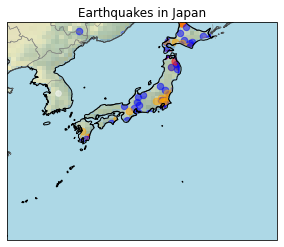

In [13]:
# Then we combine upon and map it:
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime":'2022-06-01',
    "endtime":'2023-01-01',
    "minmagnitude":'1',
    # put your countary coordinate here:
    "latitude": "35.68",
    "longitude": "139.96",
    "maxradiuskm": "5000"
}
# Make a GET request to the API endpoint
response = requests.get(url, params=params)

# Check if the response was successful
if response.status_code == 200:
    # Parse the response as GeoJSON data
    geojson_data = response.json()
    # Create a GeoDataFrame of the earthquake data
    earthquakes = gpd.GeoDataFrame.from_features(geojson_data, crs='epsg:4326')
    # Create a map of Japan using the Plate Carree projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([122, 153, 20, 45], crs=ccrs.PlateCarree())
    ax.stock_img()
    ax.coastlines()
    # Add natural earth features for land and ocean
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '110m', edgecolor='face', facecolor='lightblue'))
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    
    # Add scatter plot of earthquakes within the Japan map
    for feature in geojson_data["features"]:
        lat = feature["geometry"]["coordinates"][1]
        lon = feature["geometry"]["coordinates"][0]
        properties = feature.get("properties", {})        
        mag = properties.get("mag")
        # The colour changes with magnitude
        if mag is not None and lon >= 122 and lon <= 153 and lat >= 20 and lat <= 45:
            if mag >= 5:
                color = "red"
            elif mag >= 4.5:
                color = "orange"
            elif mag >= 4:
                color = "blue"
            else:
                color = "white"
            ax.scatter(lon, lat, s=mag*10, color=color, alpha=0.5, transform=ccrs.PlateCarree())
    plt.title("Earthquakes in Japan")
    plt.show()
   
else:
    # Print an error message if the response was unsuccessful
    print("Error: Could not retrieve earthquake data.")
# Attention: not all the countries can use this code, like Mexico.

# Conclusion

In [ ]:
# There are still many questions in this program, especially clear in the last example of Japan,
# like the area is just a square, which is suitable for large and regular countries such as Australia or 
# Canada, but this is not suitable for some small or complex countries.
# In all, it achieved showing earthquake points in different megnititude and reach their information 
# directly in a simple area sort program, and user can get the updated information of the nearest 
# earthquake by themselves.